## Install

In [1]:
# Install wordcloud (linux)
# conda install -c amueller wordcloud=1.3.1

# Install wordcloud (Windows)
# Download from : http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# pip install wordcloud‑1.3.1‑cp35‑cp35m‑win_amd64.whl

## Import

In [2]:
# Import
import glob
import timeit
import re
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
#import Stemmer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline 

## Word Cleaning

In [3]:
# create function to clean up the text
# this gets applied in the main function below
def read_bibtex(string_of_text):
    dictionary_of_words ={}
    regex = re.compile("[%()^$0-9,'\.;:!?{}]")
    
    for word in string_of_text.split(' '):
    
        # implement regex from above for each word
        m = regex.sub('', word)
        
        # drop spaces and single letters 
        if len(m) > 1:
            
            # note the use of lower case | add words to dictionary
            dictionary_of_words[m.lower()] = dictionary_of_words.get(m.lower(), 0) + 1
            
    return dictionary_of_words

## Doc finder

In [4]:
# find all the text documents in the root directory
# note that there are specific requirements to find the appropriate text
# see the bit of code below referring to -> 'abstract = {}'
docs = []

# Loop over files
for each_file in glob.glob("data/*.txt"):
    docs.append(each_file)

# Setting counting variables (used below)    
number_of_docs = len(docs)

# Print the list of docs
print(docs)

['data\\citations.txt', 'data\\more_citations.txt']


## Word stemming

In [5]:
stemmed_journal_words = {}
original_journal_words = {}
stemmer = SnowballStemmer("english")

## Text parsing

In [6]:
# Only process if there are docs
if number_of_docs != 0:
    
    # add timer
    tic = timeit.default_timer()
    word_counter = 0
    document_counter = 0
    
    # loop over docs
    for each_file in docs:
        
        # add one to the document counter to show progress
        document_counter += 1

        # provide running count down in console
        print('working on... %s (%s/%s)' %(each_file, document_counter, number_of_docs))

        # open text file
        text = open(each_file, 'r') 

        # read in each line
        for i in text.readlines(): 
            #FUTURE - read entire txt file and subset to dictionary each article
            # Then iterate over each article in the file extracting the title,
            # keywords and the abstract

            # strip white space etc
            line = i.strip()

            # find all the lines starting with abstract
            if re.search(r'^abstract', line):

                # skip if an abstract is missing - signifyed by {empty}
                if re.search(r'abstract = {}', line):
                    continue

                else:                  
                    # strip beginning and end of the abstract
                    # Be warned this is manual process: changes in Bibtex output
                    # could effect the words at the start and end of the abstract
                    line = line[12:-2]

                    # use the function read_bibtex to get a dictionary of words 
                    # without syntax defined above with regex compile
                    output_text = read_bibtex(line)

                    # pull key-value pairs from dictionary and parse out stopwords
                    for key, value in output_text.items():

                        if re.search(r'\\', key) or key in STOPWORDS:
                            pass
                        
                        else:    
                            # need to use stem package to remove plurals
                            try: 
                                key_stem = stemmer.stemWord(key)
                                stemmed_journal_words[key_stem] = stemmed_journal_words.get(
                                    key_stem.lower(), 0) + value
                            except:
                                continue
                                # if the stemming algorithm fails... ignore
                                
                            finally:        
                                # Add in original words        
                                original_journal_words[key] = original_journal_words.get(
                                    key.lower(), 0) + value

                                # to add word count to the console
                                word_counter += value

else: 
    print("No documents to process")        
    
# Finished file - add elapsed time
toc = timeit.default_timer()
time_estimator = round(toc-tic,2)/(float(document_counter)/float(number_of_docs))

# Print processing 
print('\nElapsed time: %s sec; Number of words counted: %s; Time to complete: %s sec' %(
    round(toc - tic, 1), word_counter, round(time_estimator, 1)))    

working on... data\citations.txt (1/2)
working on... data\more_citations.txt (2/2)

Elapsed time: 0.0 sec; Number of words counted: 608; Time to complete: 0.0 sec


## Check the output

In [7]:
print("Original words:", len(original_journal_words), "| Stemmed words:", len(stemmed_journal_words))

Original words: 391 | Stemmed words: 0


## Process word cloud

<function matplotlib.pyplot.show>

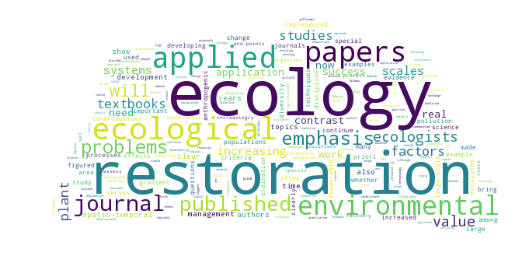

In [8]:
# Provide a mask
clip_mask = imread("img/journal.png")

# Create wordcloud
wc = WordCloud(background_color="white",width=800, height=800, mask=clip_mask, max_words = 200, stopwords=STOPWORDS) 
wc.generate_from_frequencies(original_journal_words)

# Plot
plt.imshow(wc)
plt.axis("off")
plt.show

# Output to file
#wc.to_file("tree.png") 